# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [2]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

2024-11-28 23:47:18.314711: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732837638.353636    7630 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732837638.366659    7630 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-28 23:47:18.427335: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Training data shape: (50000, 32, 32, 3), Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3), Test labels shape: (10000, 1)
Image dimensions: (32, 32, 3)
Number of classes: 100


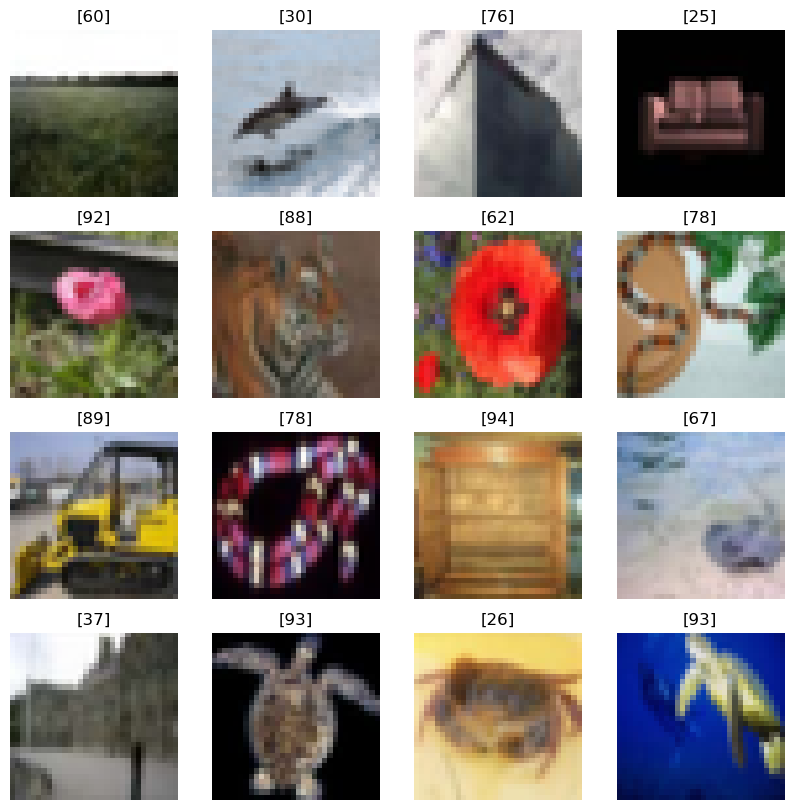

In [3]:
# Your code here

# Print dataset shapes
print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")

# Dimensions of the images
image_shape = x_train[0].shape
print(f"Image dimensions: {image_shape}")

# Number of classes
num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")

# Display some sample images
def display_samples(images, labels):
    plt.figure(figsize=(10, 10)) 
    for i in range(4*4): 
        plt.subplot(4, 4, i+1) 
        k = np.random.randint(0, images.shape[0]) 
        plt.title(labels[k]) 
        plt.imshow(images[k])
        plt.axis('off') 
    plt.show()     

# Display samples from the training set
display_samples(x_train, y_train)

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [4]:
# Your code here

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Parse numbers as floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize data
x_train = (x_train) / 255.
x_test = (x_test) / 255.

# number of classes
num_classes = len(np.unique(y_train))

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Split the training set into training and validation sets (80%-20% split)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print shapes to confirm the split
print(f"Training set shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Validation set shape: {x_val.shape}, Validation labels shape: {y_val.shape}")
print(f"Test set shape: {x_test.shape}, Test labels shape: {y_test.shape}")


Training set shape: (40000, 32, 32, 3), Training labels shape: (40000, 100)
Validation set shape: (10000, 32, 32, 3), Validation labels shape: (10000, 100)
Test set shape: (10000, 32, 32, 3), Test labels shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense 

# Define a better CNN model
def create_baseline_model():
    model = Sequential()
    
    # Block 1
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=image_shape))
    model.add(MaxPooling2D((2, 2)))
    
    # Block 2
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    # Block 3
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    # Add a classifier on top of the CNN
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(100, activation='softmax'))  # 100 classes
    
    return model

# Create the improved model
baseline_model = create_baseline_model()

# Print the model summary
baseline_model.summary()

/home/msugar_dsi_2024_08_gmail_com/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-28 23:47:30.443575: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,268 (309.64 KB)

 Trainable params: 79,268 (309.64 KB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function: Categorical Cross-Entropy</b> 
    - Reason: The dataset involves multi-class classification (100 classes). Categorical Cross-Entropy is the standard loss function for such tasks as it measures the difference between the predicted probability distribution (softmax output) and the true labels (one-hot encoded).
- <b>Optimizer: Adam</b>
    - Reason: Adam (Adaptive Moment Estimation) combines the advantages of both RMSprop and Stochastic Gradient Descent with momentum. It adapts the learning rate for each parameter, which is especially useful for handling the complexities of image data.

In [6]:
from keras import optimizers

# Your code here

# Compile the model
baseline_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',  # Adam optimizer works well initially; can switch to SGD with momentum later
    metrics=['accuracy']
)

print("Model compiled successfully.")

Model compiled successfully.


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [7]:
# Your code here

import time
training_start = time.time()

# Train the model
history = baseline_model.fit(
    x_train,
    y_train,
    epochs=20,  # Start with 20 epochs; can adjust later
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1
)

training_stop = time.time()
training_time = training_stop - training_start

# Save training history for analysis
print("Training complete.")
print(f"Training time: {training_time}")

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 24ms/step - accuracy: 0.0343 - loss: 4.3693 - val_accuracy: 0.1184 - val_loss: 3.7466
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.1433 - loss: 3.6217 - val_accuracy: 0.1843 - val_loss: 3.3676
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.2051 - loss: 3.2722 - val_accuracy: 0.2101 - val_loss: 3.2220
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.2421 - loss: 3.0659 - val_accuracy: 0.2577 - val_loss: 2.9954
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.2749 - loss: 2.8958 - val_accuracy: 0.2662 - val_loss: 2.9506
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.2981 - loss: 2.7952 - val_accuracy: 0.2944 - val_loss: 2.8169
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.3135 - loss: 2.7029 - val_accuracy: 0.2927 - val_loss: 2.8285
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.3324 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> {{test_accuracy}}
- <b>Other metric:</b> Categorical Cross-Entropy Loss
- <b>Reason for selection:</b> Cross-entropy loss measures how well the predicted probability distribution aligns with the true labels. It is particularly useful for multi-class classification problems like CIFAR-100.
- <b>Value of metric:</b> {{categorical_crossentropy_loss}}
- <b>Interpretation of metric value:</b> A lower cross-entropy loss (close to 0) indicates the model is making predictions with high confidence, while a higher value suggests less confidence or incorrect predictions.

In [8]:
# Your code here

from keras.metrics import CategoricalCrossentropy
from sklearn.metrics import classification_report

# Evaluate the model on the test set
test_loss, test_accuracy = baseline_model.evaluate(x_test, y_test, verbose=1)

# Calculate additional metric (Categorical Cross-Entropy Loss)
cce_metric = CategoricalCrossentropy()
y_pred = baseline_model.predict(x_test)
categorical_crossentropy_loss = cce_metric(y_test, y_pred).numpy()

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Categorical Cross-Entropy Loss: {categorical_crossentropy_loss:.4f}")

print("Test evaluation complete.")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3442 - loss: 2.6530
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Test Accuracy: 0.3456
Categorical Cross-Entropy Loss: 2.6569
Test evaluation complete.


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

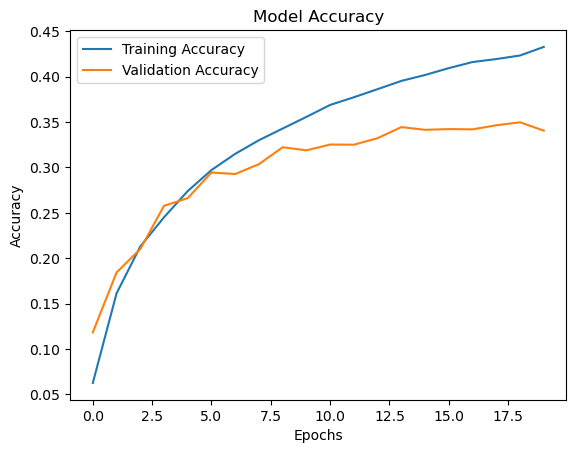

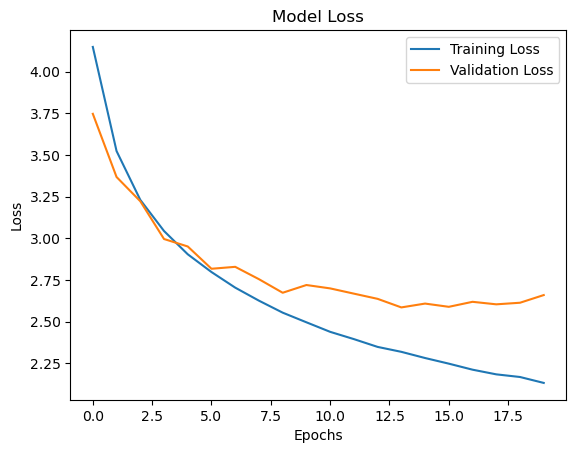

In [9]:
# Your code here

import matplotlib.pyplot as plt

# Plot training and validation accuracy
def plot_training_history(history):
    plt.figure()
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(history)

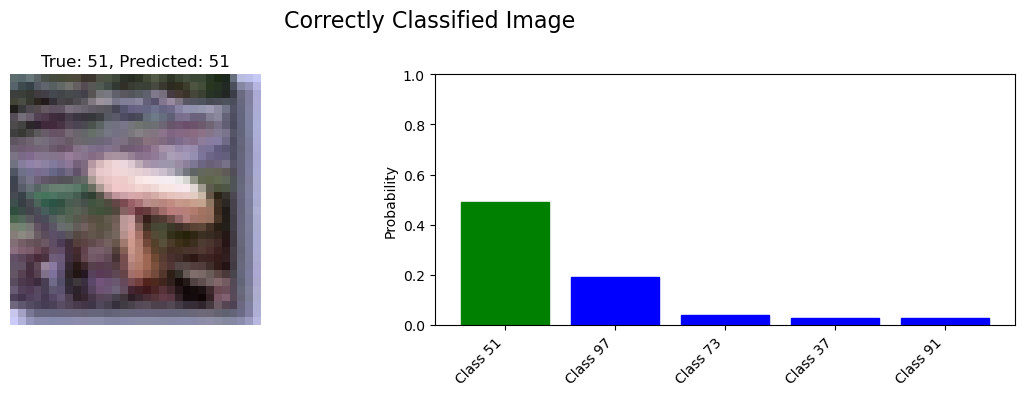

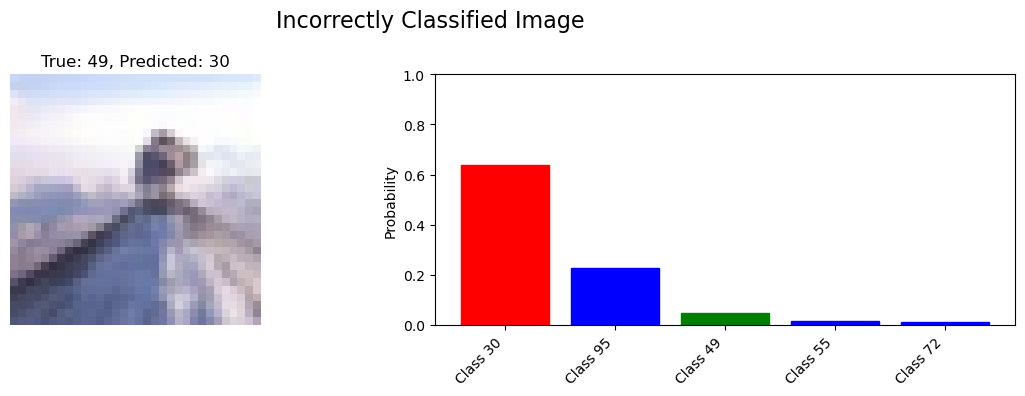

In [11]:
#import matplotlib.pyplot as plt
#import numpy as np

# Get model predictions
y_pred = baseline_model.predict(x_test)

# Convert predictions and true labels back to class indices
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Identify a correctly classified image
correct_idx = np.where(y_pred_classes == y_true_classes)[0][0]
correct_image = x_test[correct_idx]
correct_label = y_true_classes[correct_idx]
correct_probs = y_pred[correct_idx]

# Identify an incorrectly classified image
incorrect_idx = np.where(y_pred_classes != y_true_classes)[0][0]
incorrect_image = x_test[incorrect_idx]
incorrect_label = y_true_classes[incorrect_idx]
incorrect_probs = y_pred[incorrect_idx]

# Plot the images and probabilities

def plot_image_and_probs(image, probabilities, true_label, pred_label, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(title, fontsize=16)

    # Plot the image
    ax1.imshow(image)
    ax1.axis('off')
    ax1.set_title(f"True: {true_label}, Predicted: {pred_label}")

    # Sort probabilities and get top 5
    top_5_idx = np.argsort(probabilities)[-5:][::-1]
    top_5_probs = probabilities[top_5_idx]

    # Plot the probabilities
    bars = ax2.bar(range(5), top_5_probs, align='center')
    ax2.set_xticks(range(5))
    ax2.set_xticklabels([f"Class {i}" for i in top_5_idx], rotation=45, ha='right')
    ax2.set_ylim([0, 1])
    ax2.set_ylabel('Probability')

    # Highlight true and predicted labels
    for i, (idx, prob) in enumerate(zip(top_5_idx, top_5_probs)):
        color = 'green' if idx == true_label else 'red' if idx == pred_label else 'blue'
        bars[i].set_color(color)

    plt.tight_layout()
    plt.show()

# Correctly classified image
plot_image_and_probs(correct_image, correct_probs, correct_label, y_pred_classes[correct_idx], 
                     "Correctly Classified Image")

# Incorrectly classified image
plot_image_and_probs(incorrect_image, incorrect_probs, incorrect_label, y_pred_classes[incorrect_idx], 
                     "Incorrectly Classified Image")

### Discussion of Results

1. **Training and Validation Accuracy**:
   - The training accuracy improves steadily over the epochs, indicating that the model is learning from the data.
   - Validation accuracy also increases initially but starts to diverge slightly from training accuracy toward the end, suggesting a small amount of overfitting.
   - The gap between training and validation accuracy indicates the model is generalizing reasonably well but might benefit from additional regularization techniques or data augmentation to reduce overfitting.

2. **Correctly Classified Image**:
   - The model has high confidence in its prediction for the correctly classified image (Class 51). The probability for the true class is significantly higher than for other classes.
   - It shows the model has learned to extract the features relevant to Class 51 and distinguishes it effectively from other classes. The high confidence indicates that the model is well-calibrated for this image.

3. **Incorrectly Classified Image**:
   - The model misclassified the image of Class 49 as Class 30 with high confidence. Probabilities for other classes, including the true class (Class 49), are much lower.
   - The misclassification suggests the features of Class 49 might overlap with those of Class 30, leading to confusion. This could be due to:
      - Ambiguity in the image itself (e.g., unclear or noisy features).
      - Lack of sufficient distinguishing features in the training data for these classes.

4. **Does It Make Sense?**:
   - Yes, the results make sense given the complexity of the CIFAR-100 dataset. With 100 classes and relatively small images, some misclassifications are expected, especially between visually similar classes.

5. **What Do the Probabilities Indicate?**
   - For the correctly classified image, the probabilities indicate high confidence in the true class, showing that the model has learned to distinguish it effectively.
   - For the incorrectly classified image, the high confidence in the wrong class indicates that the model may have overfit to features that are not fully representative of the true class. This highlights areas where the model might benefit from more diverse training data or additional regularization.


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [ ]:
# Your code here

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [ ]:
# Your code here

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.